In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

In [3]:
# reading the CSV file into pandas dataframe
concrete_df = pd.read_csv("concrete.csv")  

In [4]:
# Check top few records to get a feel of the data structure
concrete_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

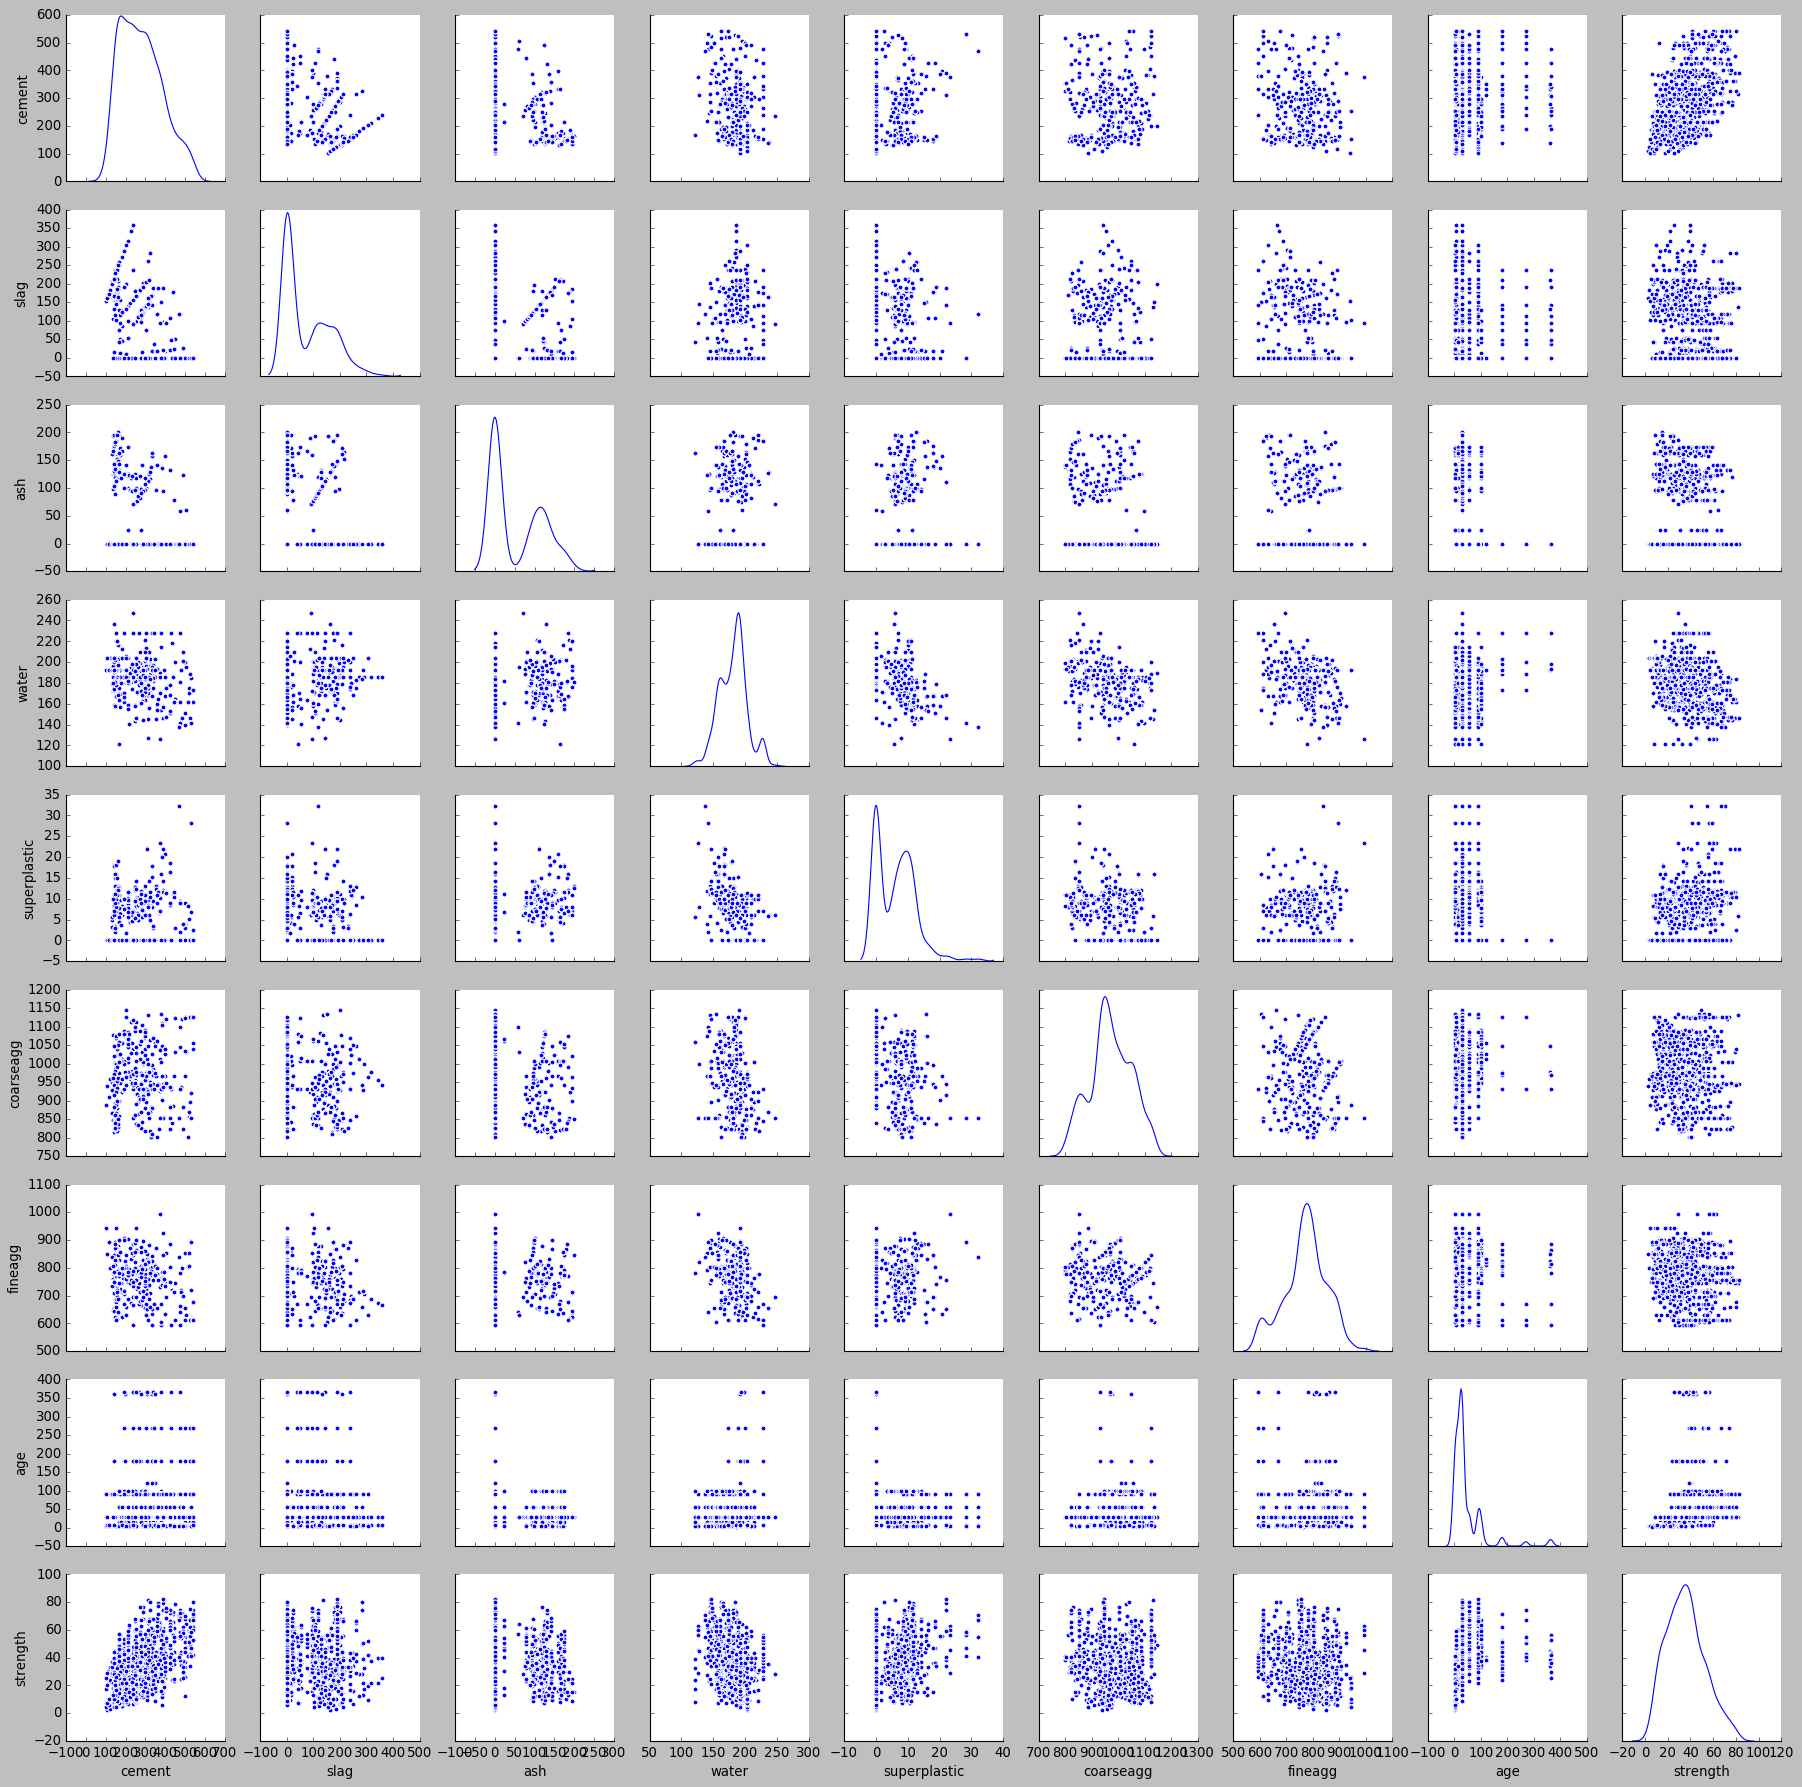

In [25]:
import seaborn as sns
sns.pairplot(concrete_df, diag_kind = 'kde')

In [5]:

X = concrete_df.drop('strength', axis=1)



y = concrete_df[['strength']]


In [6]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [7]:
# Split X and y into training and test set in 75:25 ratio

X_sample, X_test, y_sample, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [8]:
X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, test_size=0.30, random_state=1)

In [9]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.12743651164573644
The coefficient for slag is 0.11673676297605128
The coefficient for ash is 0.10041001040452242
The coefficient for water is -0.0856702233016002
The coefficient for superplastic is 0.36929960021758695
The coefficient for coarseagg is 0.030344501327554056
The coefficient for fineagg is 0.03854419399769409
The coefficient for age is 0.11149690736129492


In [11]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -65.97368774358984


In [12]:

regression_model.score(X_train, y_train)

0.5828796871142528

In [13]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_validate, y_validate)



0.6393819973191772

In [14]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

mse = np.mean((regression_model.predict(X_validate)-y_validate)**2)

math.sqrt(mse)

10.052215125180894

In [15]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred_validate = regression_model.predict(X_validate)

In [86]:
# ------------------------------------------------- ITERATION 2  ---------------------------------------------------

In [16]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_validate_scaled = X_validate.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_validate_scaled = y_validate.apply(zscore)
y_test_scaled = y_test.apply(zscore)

## Linear Model on Scaled data

In [17]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.8071696880076877
The coefficient for slag is 0.6001819510247307
The coefficient for ash is 0.3895266644858088
The coefficient for water is -0.109891786252888
The coefficient for superplastic is 0.13457317775982824
The coefficient for coarseagg is 0.14403253908354532
The coefficient for fineagg is 0.18447925002656468
The coefficient for age is 0.4376308388641931


In [19]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3.5219833699860626e-16


In [28]:
regression_model.score(X_train_scaled, y_train_scaled)

0.5828796871142526

In [20]:
regression_model.score(X_validate_scaled, y_validate_scaled)

0.6476676654356732

In [21]:
regression_model.score(X_test_scaled, y_test_scaled)

0.6432357124790746

# Let us build regularized linear model - Ridge 

## Ridge Regression on scaled data

In [62]:
ridge = Ridge(alpha=.03)
ridge.fit(X_train_scaled,y_train_scaled)
print ("Ridge model:", (ridge.coef_))


for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, ridge.coef_[0][idx]))

Ridge model: [[ 0.80638685  0.59940926  0.38883895 -0.11040176  0.13457287  0.14348317
   0.18380833  0.43753766]]
The coefficient for cement is 0.8063868473342526
The coefficient for slag is 0.5994092642335372
The coefficient for ash is 0.3888389475414149
The coefficient for water is -0.11040176277905288
The coefficient for superplastic is 0.13457287251753602
The coefficient for coarseagg is 0.14348316788526186
The coefficient for fineagg is 0.18380833469717497
The coefficient for age is 0.4375376583603467


In [63]:
intercept = ridge.intercept_[0]

print("The intercept for Ridge is {}".format(intercept))

The intercept for Ridge is -3.518549460564198e-16


In [64]:
print(ridge.score(X_train_scaled, y_train_scaled))
print(ridge.score(X_validate_scaled, y_validate_scaled))
print(ridge.score(X_test_scaled, y_test_scaled))

0.582879594942034
0.6476944846251311
0.6432671216259764


## Lasso Regression on scaled data

In [65]:
lasso = Lasso(alpha=.005)
lasso.fit(X_train_scaled,y_train_scaled)
print ("Lasso model:", (lasso.coef_))

for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, lasso.coef_[idx]))

Lasso model: [ 0.67990488  0.47193878  0.27691439 -0.19743995  0.12673244  0.04637281
  0.06955227  0.41983778]
The coefficient for cement is 0.6799048806797581
The coefficient for slag is 0.4719387755669847
The coefficient for ash is 0.27691438823019
The coefficient for water is -0.19743994579704138
The coefficient for superplastic is 0.12673244344796233
The coefficient for coarseagg is 0.046372814597460586
The coefficient for fineagg is 0.0695522687073615
The coefficient for age is 0.4198377756886359


In [66]:
intercept = lasso.intercept_[0]

print("The intercept for Lasso is {}".format(intercept))

The intercept for Lasso is -3.007500413870287e-16


In [67]:
print(lasso.score(X_train_scaled, y_train_scaled))
print(lasso.score(X_validate_scaled, y_validate_scaled))
print(lasso.score(X_test_scaled, y_test_scaled))

0.5802694823968383
0.64993990965008
0.6462031337411822


## Generate Polynomial features to capture hidden information between the features

In [68]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True)



In [69]:
X_train_scaled_poly = poly.fit_transform(X_train_scaled)
X_validate_scaled_poly = poly.fit_transform(X_validate_scaled)
X_test_scaled_poly = poly.fit_transform(X_test_scaled)



## Simple Linear Regression on polynomial features

In [70]:
regression_model.fit(X_train_scaled_poly, y_train_scaled)
regression_model.coef_

# Total number of columns now is 37

array([[-7.75106236e-17,  8.62033746e-01,  6.95142858e-01,
         4.64857155e-01, -2.25894727e-02,  2.14751466e-01,
         1.41265173e-01,  2.03797656e-01,  9.78165605e-01,
         6.74832261e-02,  1.13237249e-01, -3.44540483e-01,
        -1.58233677e-01,  2.08645563e-02, -1.44367371e-02,
         4.13035989e-01,  1.25028842e-01, -1.47356613e-01,
         4.71188147e-02,  8.50559526e-02,  9.81092754e-02,
         4.86782988e-01, -1.51347007e-01, -1.64242509e-01,
         6.79737285e-02,  9.87437523e-02,  5.92096100e-01,
         1.25545574e-01, -1.14408710e-01, -4.45708643e-02,
         1.18317857e-01,  3.61482763e-02,  8.77484798e-02,
         1.55713435e-01,  1.11319667e-01,  1.60321025e-01,
         3.39564431e-01]])

In [71]:
print(regression_model.score(X_train_scaled_poly, y_train_scaled))
print(regression_model.score(X_validate_scaled_poly, y_validate_scaled))

0.7567437537768271
0.6820104406092838


## Ridge Regression on polynomial feautures

In [72]:
ridge = Ridge(alpha=0.003)
ridge.fit(X_train_scaled_poly,y_train_scaled)
print ("Ridge model:", (ridge.coef_))


Ridge model: [[ 0.          0.86184173  0.69495578  0.46467846 -0.02273988  0.21473719
   0.14114603  0.20363081  0.97812948  0.06747955  0.11322909 -0.344468
  -0.15821128  0.02087312 -0.01443076  0.41273984  0.12500933 -0.14730631
   0.04712477  0.08504698  0.0981121   0.48654307 -0.15127707 -0.16423641
   0.06797275  0.09874936  0.59181792  0.12554283 -0.11437602 -0.04455694
   0.11808785  0.03615221  0.08774627  0.15572541  0.11132442  0.16019702
   0.3392998 ]]


In [73]:
print(ridge.score(X_train_scaled_poly, y_train_scaled))
print(ridge.score(X_validate_scaled_poly, y_validate_scaled))
print(ridge.score(X_test_scaled_poly, y_test_scaled))

0.7567437474802596
0.6820677218253391
0.7037937125251461


## Lasso Regression on polynomial features

In [78]:
lasso = Lasso(alpha=.005)
lasso.fit(X_train_scaled_poly,y_train_scaled)
print ("Lasso model:", (lasso.coef_))



Lasso model: [ 0.          0.6304267   0.45474232  0.23178395 -0.19525614  0.19205471
 -0.          0.01441679  0.9313148   0.04376751  0.05024639 -0.18490918
 -0.14109695  0.00618645 -0.          0.02036622  0.04947213 -0.03020158
  0.03035751  0.04646531  0.10305587  0.17015938 -0.01794814 -0.15785032
  0.02530825  0.08264926  0.24695919  0.0727693  -0.05919587 -0.00835499
 -0.14976731  0.03563678  0.03700763  0.17381691  0.09936089  0.
  0.        ]


In [79]:
print(lasso.score(X_train_scaled_poly, y_train_scaled))
print(lasso.score(X_validate_scaled_poly, y_validate_scaled))
print(lasso.score(X_test_scaled_poly, y_test_scaled))

0.7429666888818676
0.741366598378421
0.703771523425889


## 95% confidence interval

In [80]:
print(X_train_scaled_poly.shape)
print(X_test_scaled_poly.shape)

(504, 37)
(309, 37)


In [81]:
X_combined = np.vstack((X_train_scaled_poly, X_test_scaled_poly))
y_combined = np.vstack((y_train_scaled, y_test_scaled))

print(X_combined.shape)
print(y_combined.shape)

combined_data = np.hstack((X_combined, y_combined))
combined_data.shape

(813, 37)
(813, 1)


(813, 38)

In [82]:
from sklearn.utils import resample


values = combined_data

# configure bootstrap
n_iterations = 200        # Number of bootstrap samples to create
n_size = int(len(values) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
#	lasso = Lasso(alpha=.03)
#	lasso.fit(train[:,:-1], train[:,-1])
    # evaluate model
#	predictions = lasso.predict(test[:,:-1])
#	score = lasso.score(train[:,:-1], train[:,-1])
    
	ridge = Ridge(alpha=7)
	ridge.fit(train[:,:-1], train[:,-1])
    # evaluate model
	predictions = ridge.predict(test[:,:-1])
	score = ridge.score(train[:,:-1], train[:,-1])

	stats.append(score)
    
    

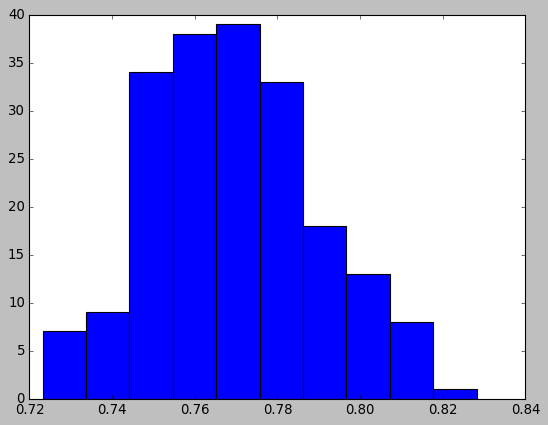

95.0 confidence interval 73.0% and 81.0%


In [83]:
from matplotlib import pyplot

# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [84]:
# Rigde with alpha of 7 is giving better confidence interval than lasso!

# Lasso 95.0 confidence interval 66.5% and 76.1%

# Ridge 95.0 confidence interval 72.9% and 80.8%

In [89]:
from sklearn.utils import resample


values = combined_data

# configure bootstrap
n_iterations = 500        # Number of bootstrap samples to create
n_size = int(len(values) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	lasso = Lasso(alpha=.003)
	lasso.fit(train[:,:-1], train[:,-1])
    # evaluate model
	predictions = lasso.predict(test[:,:-1])
	score = lasso.score(train[:,:-1], train[:,-1])
    
#	ridge = Ridge(alpha=7)
#	ridge.fit(train[:,:-1], train[:,-1])
    # evaluate model
#	predictions = ridge.predict(test[:,:-1])
#	score = ridge.score(train[:,:-1], train[:,-1])

	stats.append(score)
    
    

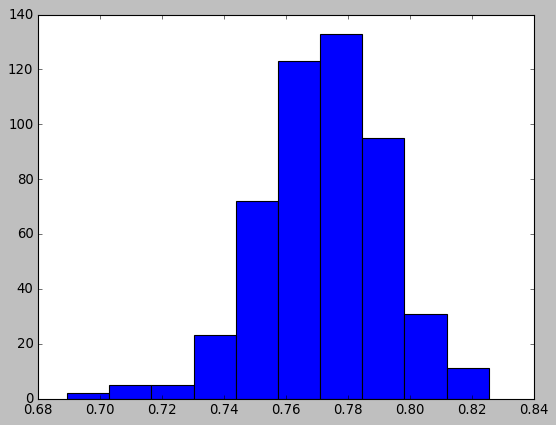

95.0 confidence interval 73.2% and 80.9%


In [90]:
from matplotlib import pyplot

# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))